In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\User\dataset.csv', encoding = "ISO-8859-1")

In [3]:
df

,MODEL,MAKE,MODEL.1,VEHICLE_CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION,CO2_EMISSIONS
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.2,202.0
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,9.6,193.0
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,9.4,191.0
3,1995,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,12.6,251.0
4,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,A4,Z,13.0,260.0
...,...,...,...,...,...,...,...,...,...,...
3535,NaN,D = Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3536,NaN,E = Ethanol (E85),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3537,NaN,N = Natural Gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3538,Fuel Consumption,City and highway fuel consumption ratings are ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


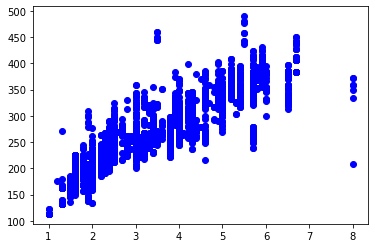

In [7]:
cdf=df[['ENGINE_SIZE','CO2_EMISSIONS']]
df2=cdf.dropna()
plt.scatter(df2.ENGINE_SIZE,df2.CO2_EMISSIONS,color='blue')
plt.show()

In [16]:
X=np.asanyarray(df2[['ENGINE_SIZE']])
Y=np.asanyarray(df2[['CO2_EMISSIONS']])
m=0
c=0
L=0.00019
epochs=1000
n=float(len(X))

for i in range (len(X)):
    y_pred=m*X+c
    D_m=(-2/n)*sum(X*(Y-y_pred))
    D_c=(-2/n)*sum((Y-y_pred))
    m=m-(L*D_m)
    c=c-(L*D_c)
print (m,c)

[63.71103419] [35.97588497]


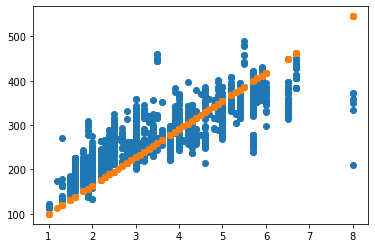

In [17]:
y_pred=m*X+c
plt.scatter(X,Y)
plt.scatter(X,y_pred)
plt.show()


In [19]:
class Linear():
    def __init__(self):
        self.m=0
        self.c=0
        self.L=0.001
    def fit(self,epochs,x,y):
        n=float(len(x))
        for i in range (epochs):
            y_pred=self.m*x+self.c
            D_m=(-2/n)*sum(x*(y-y_pred))
            D_c=(-2/n)*sum((y-y_pred))
            self.m=self.m-(self.L*D_m)
            self.c=self.c-(self.L*D_c)
    def predict(self,x):
        return (self.m*x)+self.c

In [22]:
x=np.asanyarray(df2[['ENGINE_SIZE']])
y=np.asanyarray(df2[['CO2_EMISSIONS']])
object=Linear()
object.fit(1000,x,y)
object.predict(300)

array([18544.8016574])